In [1]:
from google.colab import drive


In [2]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [4]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/My Drive/Datasets/Train'
valid_path = '/content/drive/My Drive/Datasets/Test'

In [5]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 1s 0us/step


In [6]:
for layer in resnet.layers:
    layer.trainable = False

In [7]:
folders = glob('/content/drive/My Drive/Datasets/Train/*')

In [8]:
folders

['/content/drive/My Drive/Datasets/Train/porsche',
 '/content/drive/My Drive/Datasets/Train/mercedes',
 '/content/drive/My Drive/Datasets/Train/lamborghini',
 '/content/drive/My Drive/Datasets/Train/minicooper',
 '/content/drive/My Drive/Datasets/Train/audi']

In [9]:
test_folders = glob('/content/drive/My Drive/Datasets/Test/*')

In [10]:
test_folders

['/content/drive/My Drive/Datasets/Test/porsche',
 '/content/drive/My Drive/Datasets/Test/minicooper',
 '/content/drive/My Drive/Datasets/Test/lamborghini',
 '/content/drive/My Drive/Datasets/Test/mercedes',
 '/content/drive/My Drive/Datasets/Test/audi']

In [11]:
x = Flatten()(resnet.output)

In [12]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [13]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [14]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [16]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 208 images belonging to 5 classes.


In [17]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 86 images belonging to 5 classes.


In [18]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
7/7 [==============================] - 77s 11s/step - loss: 11.2958 - accuracy: 0.2019 - val_loss: 6.1836 - val_accuracy: 0.2326
Epoch 2/50
7/7 [==============================] - 4s 529ms/step - loss: 5.8592 - accuracy: 0.2019 - val_loss: 5.9315 - val_accuracy: 0.1047
Epoch 3/50
7/7 [==============================] - 4s 507ms/step - loss: 3.2644 - accuracy: 0.2788 - val_loss: 2.2870 - val_accuracy: 0.3605
Epoch 4/50
7/7 [==============================] - 4s 510ms/step - loss: 2.3676 - accuracy: 0.3894 - val_loss: 2.1942 - val_accuracy: 0.2791
Epoch 5/50
7/7 [==============================] - 3s 500ms/step - loss: 1.8348 - accuracy: 0.3942 - val_loss: 2.9259 - val_accuracy: 0.2791
Epoch 6/50
7/7 [==============================] - 4s 517ms/step - loss: 1.6626 - accuracy: 0.4423 - val_loss: 1.6561 - val_accuracy: 0.4419
Epoch 7/50
7/7 [==============================] - 4s 502ms/step - loss: 1.2154 - acc

In [36]:
from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [64]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [65]:
model=load_model('/content/model_resnet50.h5')

In [66]:
folders

['/content/drive/My Drive/Datasets/Train/porsche',
 '/content/drive/My Drive/Datasets/Train/mercedes',
 '/content/drive/My Drive/Datasets/Train/lamborghini',
 '/content/drive/My Drive/Datasets/Train/minicooper',
 '/content/drive/My Drive/Datasets/Train/audi']

In [67]:
img=image.load_img('/content/drive/My Drive/Datasets/Test/audi/22.jpg',target_size=(224,224))

# x=image.img_to_array(img)
# x

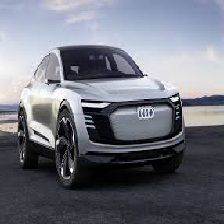

In [68]:
img

In [69]:
# x=np.expand_dims(x,axis=0)
# img_data=preprocess_input(x)
# img_data.shape

In [70]:
# model.predict(img_data)

In [71]:
# a=np.argmax(model.predict(img_data), axis=1)

In [72]:
# a

In [73]:
folders

['/content/drive/My Drive/Datasets/Train/porsche',
 '/content/drive/My Drive/Datasets/Train/mercedes',
 '/content/drive/My Drive/Datasets/Train/lamborghini',
 '/content/drive/My Drive/Datasets/Train/minicooper',
 '/content/drive/My Drive/Datasets/Train/audi']

In [75]:
# test_folders

['/content/drive/My Drive/Datasets/Test/porsche',
 '/content/drive/My Drive/Datasets/Test/minicooper',
 '/content/drive/My Drive/Datasets/Test/lamborghini',
 '/content/drive/My Drive/Datasets/Test/mercedes',
 '/content/drive/My Drive/Datasets/Test/audi']

In [74]:

image = image.img_to_array(img)



image = image/255.  # Add this line 



image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))



np.argmax(model.predict(image),axis=1)

array([2])